In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [2]:
#function to define plots
def define_plot(clf, X, y, title, index, dims):
    plt.subplot(dims[0], dims[1], index)
    plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)
    plt.xlabel(X.columns[0], size=14)
    plt.ylabel(X.columns[1], size=14)
    plt.title(title, size=16)
    plt.axvline(x=0, color='black', linestyle='--')
    plt.axhline(y=0, color='black', linestyle='--')

### Comparing perceptron learning with hard margin linear svm

* Here we will be modeling the number of months that a person remains enrolled before eventually quitting

* Recall that the probability of dropping declines as the students get close to completing the training
  * The longer the student has paid, the less likely they are to drop out
  * A person is more likely to quit on the first month of enrollment than any other month 
  *  The probability of unenrolling during month $t$ is always higher than the probability of unenrolling during month $t+1$

In [7]:
#training data in quadrants 2 and 4
#large improvement with svm when test data was linearly bounded 
    #however, results are very dependent upon how training data is distributed
x_1 = list(np.random.uniform(low=-5, high=-2, size=25))
y_1 = list(np.random.uniform(low=2, high=5, size=25))
x_1.extend(list(np.random.uniform(low=2, high=5, size=25)))
y_1.extend(list(np.random.uniform(low=-5, high=-2, size=25)))

In [4]:
#training data uniform 
x_1 = np.random.uniform(low=-5, high=5, size=50)
y_1 = np.random.uniform(low=-5, high=5, size=50)

In [5]:
#training data bounded between two lines
def data_lin_bound(x_values):
    y_values = []
    intercept = 1
    for i in range(len(x_values)):
        x = x_values[i]
        low_x = x - intercept
        high_x = x + intercept
        y = np.random.uniform(low=low_x, high=high_x, size=1)[0]
        y_values.append(y)
    return y_values

x_1 = list(np.random.uniform(low=-5, high=5, size=50))
y_1 = data_lin_bound(x_1)

### Give correct label to data


In [13]:
### Simple perceptron And with random data
def and_label(df):
    rtn = []
    for i in range(df.shape[0]):
        if df['X'][i] >= df['Y'][i]:
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn

accuracy of Perceptron on training data for 50 training data points: 100.0%
accuracy of linear svm on training data for 50 training data points: 100.0%
accuracy of Perceptron on test data over 10 sets of 100 data points: 72.45%
accuracy of linear svm on test data over 10 sets of 100 data points: 83.00000000000001%


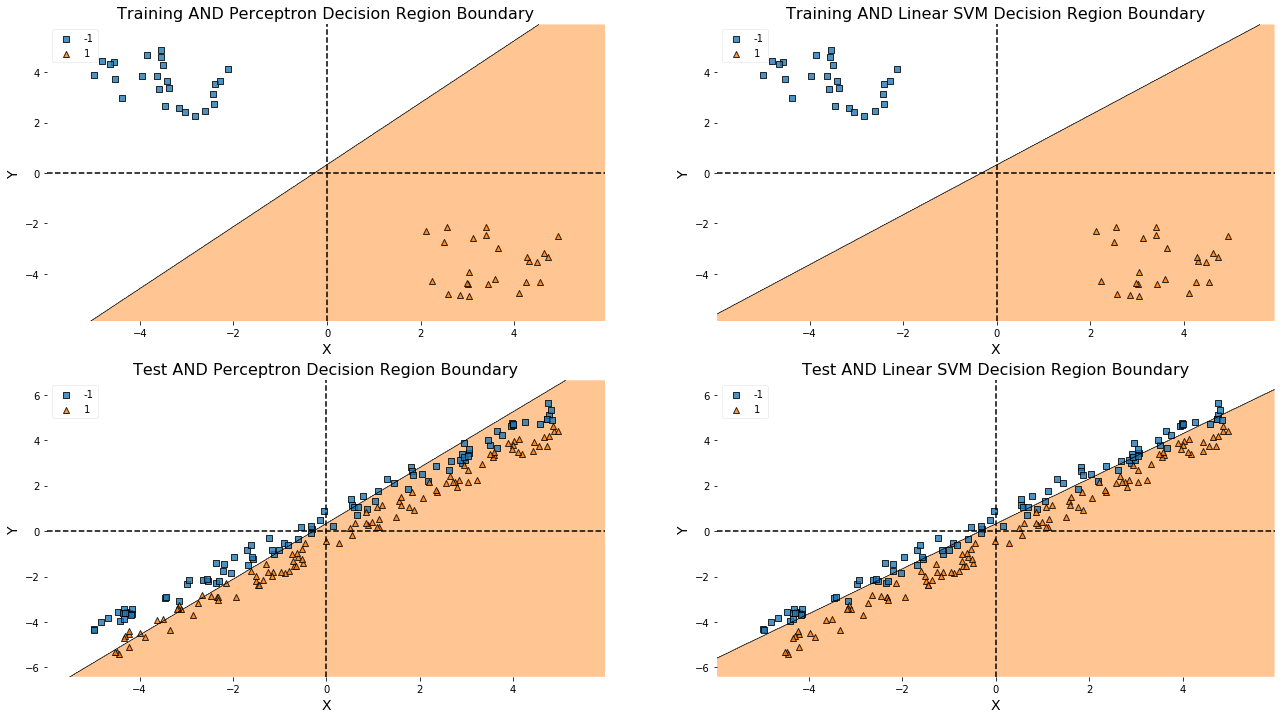

In [8]:
#number of samples for each trial
test_data_size = 200
#number of trials
trials = 10

gaussian_x_loc = 0
gaussian_y_loc = 0
gaussian_x_scale = 2.5
gaussian_y_scale = 1.5

percep_avg_train = 0
percep_avg_test = 0
svm_avg_train = 0
svm_avg_test = 0

and_df_train = pd.DataFrame({'X': x_1,
                       'Y': y_1})
and_df_train['Label'] = and_label(and_df_train)

X = and_df_train[['X', 'Y']]
y = and_df_train['Label']

clf_perceptron = Perceptron(tol=1e-3, random_state=0)
clf_perceptron.fit(X.values, y.values) 
clf_linear_svm = svm.SVC(kernel='linear', C = 1.0)
clf_linear_svm.fit(X.values, y.values)

percep_avg_train = (clf_perceptron.score(X.values, y.values))
svm_avg_train = (clf_linear_svm.score(X.values, y.values))

for _ in range(trials):

    #test from uniform dataset
    #x_test = np.random.uniform(low=-5, high=5, size=test_data_size)
    #y_test = np.random.uniform(low=-5, high=5, size=test_data_size)

    #gaussian datasets
    #test from gaussian dataset
    #x_test = np.random.normal(loc=gaussian_x_loc, scale=gaussian_x_scale, size=test_data_size)
    #y_test = np.random.normal(loc=gaussian_y_loc, scale=gaussian_y_scale, size=test_data_size)
    
    
    #linear bound datasets
    x_test = np.random.uniform(low=-5, high=5, size=test_data_size)
    y_test = data_lin_bound(x_test)

    and_df_test = pd.DataFrame({'X': x_test,
                           'Y': y_test})
    and_df_test['Label'] = and_label(and_df_test)

    X_test = and_df_test[['X', 'Y']]
    y_test = and_df_test['Label']

    
    percep_avg_test += (clf_perceptron.score(X_test.values, y_test.values))
    svm_avg_test += (clf_linear_svm.score(X_test.values, y_test.values))

plt.figure(figsize=(22,12))
dims = [2,2]

#plot perceptron training data
define_plot(clf_perceptron, X, y, 'Training AND Perceptron Decision Region Boundary', 1, dims)

#plot linear svm training data
define_plot(clf_linear_svm, X, y, 'Training AND Linear SVM Decision Region Boundary', 2, dims)

#plot perceptron test data
define_plot(clf_perceptron, X_test, y_test, 'Test AND Perceptron Decision Region Boundary', 3, dims)

#plot linear svm test data
define_plot(clf_linear_svm, X_test, y_test, 'Test AND Linear SVM Decision Region Boundary', 4, dims)

print("accuracy of Perceptron on training data for 50 training data points: " + str(100*percep_avg_train) + "%")
print("accuracy of linear svm on training data for 50 training data points: " + str(100*svm_avg_train) + "%")

print("accuracy of Perceptron on test data over " + str(trials) + " sets of 100 data points: " + str(100*percep_avg_test/trials) + "%")
print("accuracy of linear svm on test data over " + str(trials) + " sets of 100 data points: " + str(100*svm_avg_test/trials) + "%")


In [11]:
def xor_label(df):
    rtn = []
    for i in range(50):
        if (df['X'][i] >= 0 and df['Y'][i] < 0) or (df['X'][i] < 0 and df['Y'][i] >= 0):
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn
xor_df = pd.DataFrame({'X': np.random.uniform(low=-5, high=5, size=50),
                       'Y': np.random.uniform(low=-5, high=5, size=50)})
xor_df['Label'] = xor_label(xor_df)

X = xor_df[['X', 'Y']]
y = xor_df['Label']

clf_lin = svm.SVC(kernel='linear')
clf_lin.fit(X.values, y.values) 

clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(X.values, y.values) 

clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X.values, y.values) 

clf_sigmoid = svm.SVC(kernel='sigmoid')
clf_sigmoid.fit(X.values, y.values) 


/Users/aidanakamine/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aidanakamine/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aidanakamine/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

accuracy for linear svm: 74.0%
accuracy for polynomial svm: 64.0%
accuracy for rbf svm: 100.0%
accuracy for sigmoid svm: 36.0%


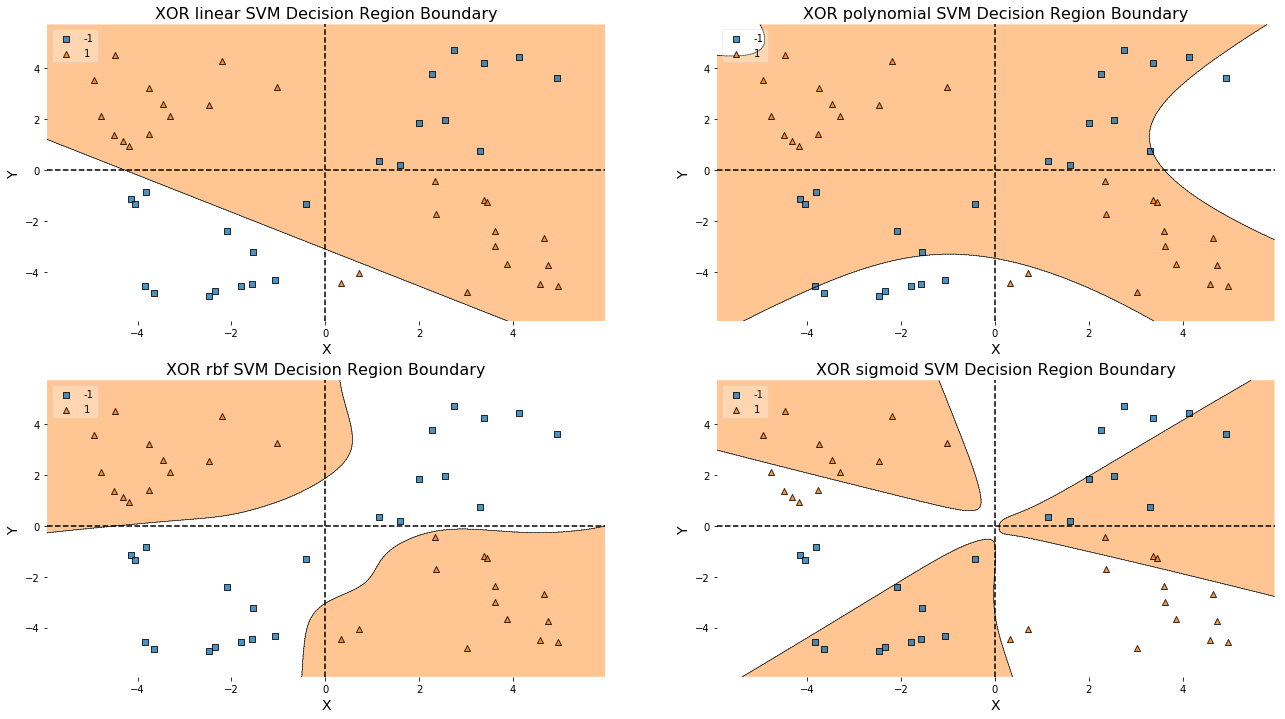

In [12]:
print("accuracy for linear svm: " + str(clf_lin.score(X.values, y.values)*100 )+ "%")
print("accuracy for polynomial svm: " + str(clf_poly.score(X.values, y.values)*100 )+ "%")
print("accuracy for rbf svm: " + str(clf_rbf.score(X.values, y.values)*100 )+ "%")
print("accuracy for sigmoid svm: " + str(clf_sigmoid.score(X.values, y.values)*100 )+ "%")

plt.figure(figsize=(22,12))
dims = [2,2]

#XOR SVM Decision Region Boundary
define_plot(clf_lin, X, y, "XOR linear SVM Decision Region Boundary", 1, dims)
define_plot(clf_poly, X, y, "XOR polynomial SVM Decision Region Boundary", 2, dims)
define_plot(clf_rbf, X, y, "XOR rbf SVM Decision Region Boundary", 3, dims)
define_plot(clf_sigmoid, X, y, "XOR sigmoid SVM Decision Region Boundary", 4, dims)

plt.show()